In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('sp500_monthly_data.csv')

unique_tickers = df['Ticker'].unique()
print(unique_tickers)

['A' 'AAPL' 'ABBV' 'ABNB' 'ABT' 'ACGL' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADSK' 'AEE' 'AEP' 'AES' 'AFL' 'AIG' 'AIZ' 'AJG' 'AKAM' 'ALB' 'ALGN'
 'ALL' 'ALLE' 'AMAT' 'AMCR' 'AMD' 'AME' 'AMGN' 'AMP' 'AMT' 'AMZN' 'ANET'
 'ANSS' 'AON' 'AOS' 'APA' 'APD' 'APH' 'APO' 'APTV' 'ARE' 'ATO' 'AVB'
 'AVGO' 'AVY' 'AWK' 'AXON' 'AXP' 'AZO' 'BA' 'BAC' 'BALL' 'BAX' 'BBY' 'BDX'
 'BEN' 'BG' 'BIIB' 'BK' 'BKNG' 'BKR' 'BLDR' 'BLK' 'BMY' 'BR' 'BRK.B' 'BRO'
 'BSX' 'BWA' 'BX' 'BXP' 'C' 'CAG' 'CAH' 'CARR' 'CAT' 'CB' 'CBOE' 'CBRE'
 'CCI' 'CCL' 'CDNS' 'CDW' 'CE' 'CEG' 'CF' 'CFG' 'CHD' 'CHRW' 'CHTR' 'CI'
 'CINF' 'CL' 'CLX' 'CMCSA' 'CME' 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COO'
 'COP' 'COR' 'COST' 'CPAY' 'CPB' 'CPRT' 'CPT' 'CRL' 'CRM' 'CRWD' 'CSCO'
 'CSGP' 'CSX' 'CTAS' 'CTRA' 'CTSH' 'CTVA' 'CVS' 'CVX' 'CZR' 'D' 'DAL'
 'DAY' 'DD' 'DE' 'DECK' 'DELL' 'DFS' 'DG' 'DGX' 'DHI' 'DHR' 'DIS' 'DLR'
 'DLTR' 'DOC' 'DOV' 'DOW' 'DPZ' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN' 'DXCM' 'EA'
 'EBAY' 'ECL' 'ED' 'EFX' 'EG' 'EIX' 'EL' 'ELV' 'EMN' 'EMR' '

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df.set_index('Date', inplace=True)

In [19]:
name = 'IP'
ticker_df = df[df['Ticker'] == f'{name}'].copy()

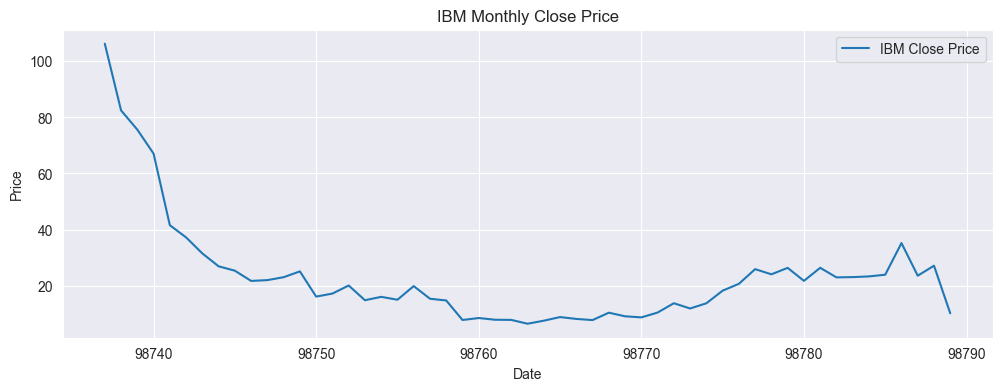

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(ticker_df['Close'], label=f'{name} Close Price')
plt.title(f'{name} Monthly Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
print("Summary Statistics:")
print(ticker_df['Close'].describe())

Summary Statistics:
count     53.000000
mean      23.304717
std       19.474410
min        6.420000
25%       10.400000
50%       20.050000
75%       25.330000
max      106.270000
Name: Close, dtype: float64


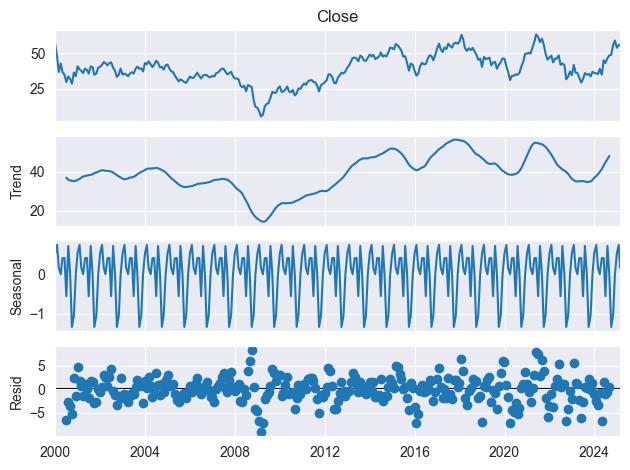

In [20]:
decomp = seasonal_decompose(ticker_df['Close'], model='additive', period=12)
decomp.plot()
plt.show()

<Figure size 1200x400 with 0 Axes>

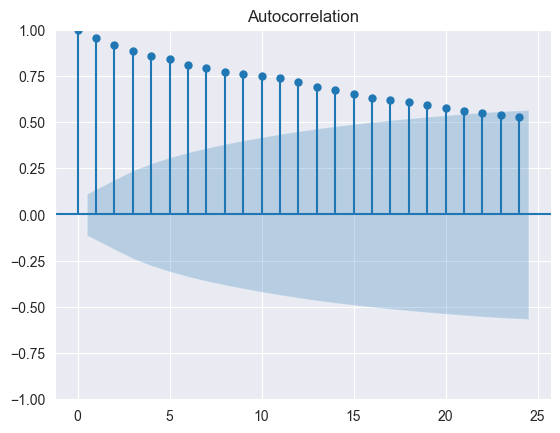

<Figure size 1200x400 with 0 Axes>

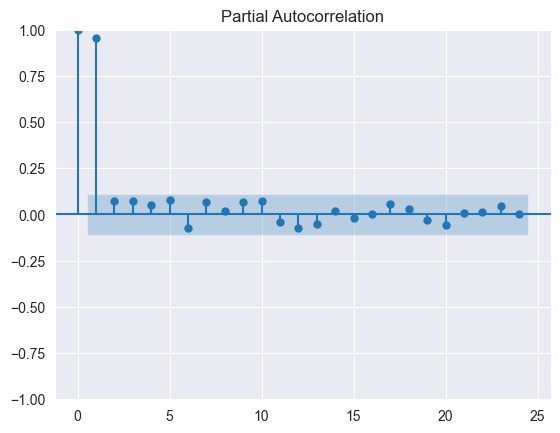

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 4))
plot_acf(ticker_df['Close'], lags=24)
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(ticker_df['Close'], lags=24)
plt.show()

In [10]:
result = adfuller(ticker_df['Close'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.022130
p-value: 0.956663
